# 引入数据

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, MeanShift, Birch, DBSCAN
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 评价方法
from sklearn.metrics import adjusted_rand_score         # 聚类模型评估工具
from sklearn.metrics import silhouette_score            # 轮廓系数（Silhouette Coefficient）
from sklearn.metrics import calinski_harabasz_score     # Calinski-Harabasz指数
from sklearn.metrics import v_measure_score             # V-分数（V-Measure）

# 加载鸢尾花数（Iris）据集
iris = load_iris() 
data = iris.data[:,:] # 取四列（花萼长、宽；花瓣长、宽）作为特征数据
target = iris.target # 标签数据
feature_names = iris.feature_names[:] # 列的名字
df = pd.DataFrame(data, columns=feature_names)# 创建数据框
display(df) # 显示数据集

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 训练

## K-均值聚类（KMeans）

In [15]:
# 注意：聚类模型的评估使用sklearn.metrics.adjusted_rand_score函数
# 参数1-实际类别标签
# 参数2-聚类结果标签
# 调用聚类算法

model = KMeans(3, n_init=10).fit(data) # K-均值聚类

# model = MeanShift().fit(data) # 均值漂移聚类
# model = Birch().fit(data) # Birch聚类
c_target = model.labels_ # 聚类结果标签

# 计算实际聚类数量
print("实际聚类数量:", len(np.unique(c_target)))

# 使用adjusted_rand_score函数来评估聚类效果
# 参数1-实际类别标签
# 参数2-聚类结果标签
print('adjusted_rand_score:     ', adjusted_rand_score(target, c_target))

# 计算轮廓系数
silhouette_avg = silhouette_score(data, c_target)
print("整体轮廓系数:             ", silhouette_avg)

# 计算Calinski-Harabasz指数
calinski_harabasz_index = calinski_harabasz_score(data, c_target)
print("Calinski-Harabasz指数:   ", calinski_harabasz_index)

# 计算V-Measure
v_measure = v_measure_score(target, c_target)
print("V-分数(V-Measure):       ", v_measure)

实际聚类数量: 3
adjusted_rand_score:      0.7302382722834697
整体轮廓系数:              0.5528190123564095
Calinski-Harabasz指数:    561.62775662962
V-分数(V-Measure):        0.7581756800057784


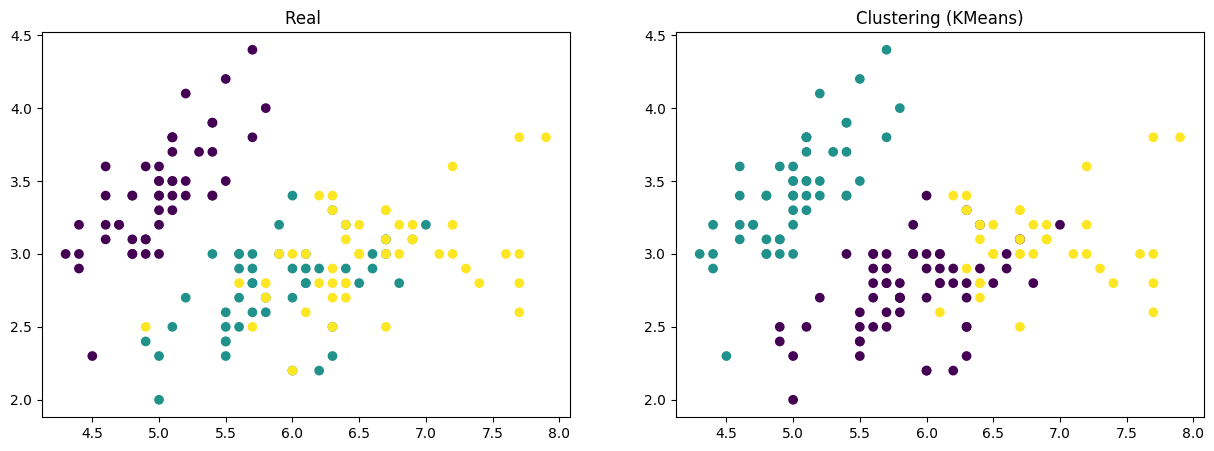

In [10]:
# 定义画板尺寸
fig = plt.figure(figsize=(15, 5))

# 画第一幅子图——实际类别标签
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Real ')
ax1.scatter(data[:,0], data[:,1], c=target)

# 画第二幅子图——聚类结果
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Clustering (KMeans)')
ax2.scatter(data[:,0], data[:,1], c=c_target)

# 显示图形
plt.show()

## 均值漂移聚类（MeanShift）

In [18]:
# 注意：聚类模型的评估使用sklearn.metrics.adjusted_rand_score函数
# 参数1-实际类别标签
# 参数2-聚类结果标签
# 调用聚类算法

# model = KMeans(3).fit(data) # K-均值聚类

model = MeanShift(bandwidth=0.85).fit(data) # 均值漂移聚类
# model = Birch().fit(data) # Birch聚类
c_target = model.labels_ # 聚类结果标签

# 计算实际聚类数量
print("实际聚类数量:", len(np.unique(c_target)))

# 使用adjusted_rand_score函数来评估聚类效果
# 参数1-实际类别标签
# 参数2-聚类结果标签
print('adjusted_rand_score:     ', adjusted_rand_score(target, c_target))

# 计算轮廓系数
silhouette_avg = silhouette_score(data, c_target)
print("整体轮廓系数:             ", silhouette_avg)

# 计算Calinski-Harabasz指数
calinski_harabasz_index = calinski_harabasz_score(data, c_target)
print("Calinski-Harabasz指数:   ", calinski_harabasz_index)

# 计算V-Measure
v_measure = v_measure_score(target, c_target)
print("V-分数(V-Measure):       ", v_measure)

实际聚类数量: 3
adjusted_rand_score:      0.7436826319432358
整体轮廓系数:              0.5511573791952857
Calinski-Harabasz指数:    560.1394503001885
V-分数(V-Measure):        0.7660355440487252


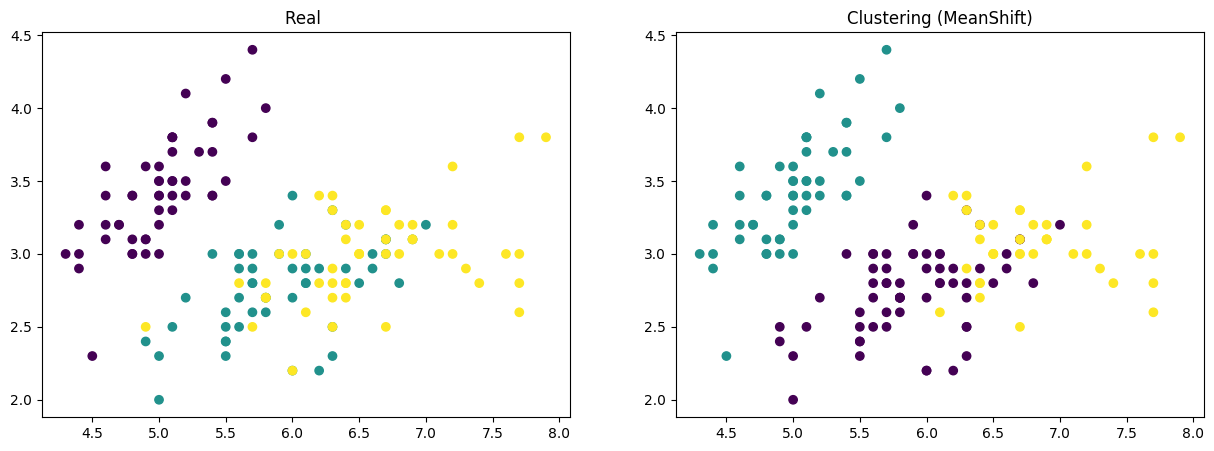

In [16]:
# 定义画板尺寸
fig = plt.figure(figsize=(15, 5))

# 画第一幅子图——实际类别标签
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Real ')
ax1.scatter(data[:,0], data[:,1], c=target)

# 画第二幅子图——聚类结果
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Clustering (MeanShift)')
ax2.scatter(data[:,0], data[:,1], c=c_target)

# 显示图形
plt.show()

## Birch聚类（Birch）

In [17]:
# 注意：聚类模型的评估使用sklearn.metrics.adjusted_rand_score函数
# 参数1-实际类别标签
# 参数2-聚类结果标签
# 调用聚类算法

# model = KMeans(3).fit(data) # K-均值聚类

# model = MeanShift().fit(data) # 均值漂移聚类
model = Birch(threshold=0.4, branching_factor=50).fit(data) # Birch聚类
c_target = model.labels_ # 聚类结果标签

# 计算实际聚类数量
print("实际聚类数量:", len(np.unique(c_target)))

# 使用adjusted_rand_score函数来评估聚类效果
# 参数1-实际类别标签
# 参数2-聚类结果标签
print('adjusted_rand_score:     ', adjusted_rand_score(target, c_target))

# 计算轮廓系数
silhouette_avg = silhouette_score(data, c_target)
print("整体轮廓系数:             ", silhouette_avg)

# 计算Calinski-Harabasz指数
calinski_harabasz_index = calinski_harabasz_score(data, c_target)
print("Calinski-Harabasz指数:   ", calinski_harabasz_index)

# 计算V-Measure
v_measure = v_measure_score(target, c_target)
print("V-分数(V-Measure):       ", v_measure)

实际聚类数量: 3
adjusted_rand_score:      0.7455038681804481
整体轮廓系数:              0.5553062646081594
Calinski-Harabasz指数:    556.1176919037501
V-分数(V-Measure):        0.7979885217013319


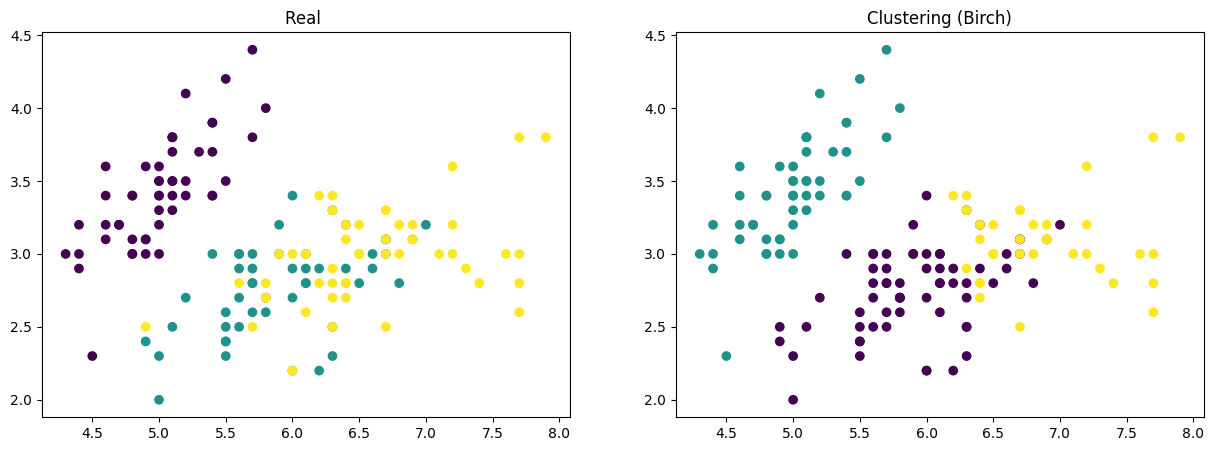

In [14]:
# 定义画板尺寸
fig = plt.figure(figsize=(15, 5))

# 画第一幅子图——实际类别标签
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Real ')
ax1.scatter(data[:,0], data[:,1], c=target)

# 画第二幅子图——聚类结果
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Clustering (Birch)')
ax2.scatter(data[:,0], data[:,1], c=c_target)

# 显示图形
plt.show()